<h1>Import Module<h1>

In [3]:
!pip install tensorflow

!pip install opencv-python
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.losses as losses
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow.keras.optimizers as optimizers
!pip install keras-tuner --upgrade
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
import time

LOG_DIR = f"{int(time.time())}"
from keras.layers import BatchNormalization
from tempfile import TemporaryFile
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow.keras.regularizers as regularizers

import cv2
print(cv2.__version__)

import random
from PIL import Image
import matplotlib.patches as patches
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

print("Installed")

import time

training_data = []
test_data = []
RESIZE_VALUE = 130
root_path = "D:/aircraft_image_dataset/"

4.10.0
Installed


<h1>Image Augmentation<h1>

In [ ]:
#dataset_dir = "/content/drive/My Drive/dataset_aircraft"
     

def image_process():
  #image processing (dataset image randomizer)
  plane = "C-5/"
  datagen = ImageDataGenerator(
          rotation_range=360,
          width_shift_range=0,
          height_shift_range=0,
          shear_range=0,
          zoom_range=0.0,
          horizontal_flip=True,
          fill_mode='nearest')
  
  selected_path = root_path+plane
  for img_ in os.listdir(selected_path):
    img = load_img(selected_path+img_)  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir=root_path+plane, save_prefix=img_, save_format='jpeg'):
        i += 1
        if i > 20: # the number of image generation (amendments) per selected picture
            break
image_process()
     

In [4]:
# outputs the names of the files currently in the google drive file (dataset) 
types_path = "D:/aircraft_image_dataset/TYPE-NAMES.txt"
aircraft_types = []
f = open(types_path, "r")
for types in f.read().split():
  aircraft_types.append(types.replace('"',''))
print(len(aircraft_types))
f.close()
print("Selected aircraft files:",aircraft_types)
print("Files in dataset :",os.listdir(root_path))

8
Selected aircraft files: ['B-2', 'B-52', 'C-5', 'C-130', 'C-135', 'E-3', 'KC-10', 'BareLand']
Files in dataset : ['.ipynb_checkpoints', 'Air-info', 'B-2', 'B-52', 'BareLand', 'C-130', 'C-135', 'C-5', 'E-3', 'ining_dataset.npz', 'KC-10', 'MAC.ipynb', 'Model V1', 'Model V2', 'Model V3', 'Model V4', 'Model V5', 'Model V6', 'Model V7', 'Model V8', 'paper.docx', 'primary.npz', 'primary_training_dataset.npz', 'R - CNN DATASETS', 'sample', 'Screenshot (51).png', 'Screenshot (52).png', 'Testing Images', 'training_dataset.npz', 'TYPE-NAMES.txt']


<h1>Training Dataset<h1>

In [ ]:
def create_training_data():
    # function iterates through each file in the google drive dataset and converts each image into an array
  for type in aircraft_types:
    selected_path = root_path + type
    class_num = aircraft_types.index(type)
    for img in os.listdir(selected_path):
      try:
        image = Image.open(os.path.join(selected_path,img))
        img_array = np.array(image)
        aircraft_img = cv2.resize(img_array, (RESIZE_VALUE, RESIZE_VALUE))
        training_data.append([aircraft_img, class_num])
      except Exception as e:
        print("error:",selected_path,image)
 
create_training_data()
random.shuffle(training_data)
print(len(training_data))
print(training_data[0][1])
plt.imshow(training_data[0][0])

In [4]:
# saves all generated arrays of images to a file
np.savez_compressed(root_path+'primary.npz', a=training_data)

<h1>Load Training Data<h1>

In [5]:
def load_training_data():
  #LOAD TRAINING DATA INTO ARRAY FROM FILE
  loaded = np.load(root_path+"primary_training_dataset.npz", allow_pickle=True)
  training_data = loaded['a']
  for x in range(len(training_data)):
    if (training_data[x][0].shape[2] == 4):
      training_data[x][0] = cv2.cvtColor(training_data[x][0], cv2.COLOR_BGRA2BGR)
  return training_data
training_data = load_training_data()
random.shuffle(training_data)
print(len(training_data))

78374


In [7]:
x_train = []
y_train = []

#x_test = []
#y_test = []

#for data, label in testing_data:
#  x_test.append(data)
#  y_test.append(label)

for data, label in training_data:
  x_train.append(data)
  y_train.append(label)

x_train = np.asarray(x_train)
x_train = np.array(x_train).reshape(-1, RESIZE_VALUE, RESIZE_VALUE, 3)
y_train = np.asarray(y_train)

#x_test = np.asarray(x_test)
#x_test = np.array(x_test).reshape(-1, RESIZE_VALUE, RESIZE_VALUE, 3)
#y_test = np.asarray(y_test)

x_train = x_train / 255
#x_test = x_test / 255
print(len(x_train))
#print(len(x_test))

MemoryError: Unable to allocate 29.6 GiB for an array with shape (78374, 130, 130, 3) and data type float64

<h1>Model Summary<h1>

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TFSMLayer

# Wrap the SavedModel in a TFSMLayer
model = Sequential([
    TFSMLayer('D:/aircraft_image_dataset/Model V8', call_endpoint='serving_default')
])



In [13]:
# Attempt to summarize the model, though it might be limited
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tfsm_layer_2 (TFSMLayer)        │ ?                      │     2,864,314 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,864,314 (10.93 MB)

 Trainable params: 2,864,314 (10.93 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
def build_model_MAC():
    # main model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape = (130,130,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))



    model.add(Flatten())

    model.add(Dense(450))
    model.add(Activation('relu'))
    model.add(Dropout(.65))

    aircraft_types = ['B-2', 'B-52', 'C-5', 'C-130', 'C-135', 'E-3', 'KC-10', 'BareLand']

    model.add(Dense(len(aircraft_types)))
    model.add(Activation("softmax"))

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=opt,
                    metrics=['acc'])

    return model

model = build_model_MAC()


epochs = 10
x = np.arange(epochs) + 1
history_ = model.fit(x_train, y_train, epochs=epochs, validation_split=.30, batch_size=64)
plt.plot(x,history_.history['acc'])
plt.plot(x,history_.history['val_acc'])
plt.xlabel("Epochs");
plt.ylabel("Accuracy")
plt.legend(['Training Accuacy', 'Cross Validation Accuracy']);

fig, ax = plt.subplots()
ax.plot(x,history_.history['loss'])
ax.plot(x,history_.history['val_loss'])
plt.xlabel("Epochs");
plt.ylabel("Loss")
plt.legend(['Training Loss', 'Cross Validation Loss']);

D:\downloads\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'x_train' is not defined

In [ ]:
model.save(root_path+"Model V7")

Input Image:  B2.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
True value: B2.jpg
Identified as: C-135 

C-135


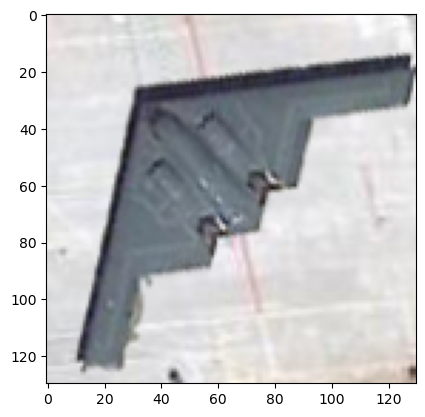

In [24]:
def testSingleAircraft():
    # function takes a single image of an aircraft and classifies the aircraft category
    img = input("Input Image: ")
    image = Image.open(os.path.join(root_path + "/sample/", img))
    img_array = np.array(image)
    aircraft_img = cv2.resize(img_array, (RESIZE_VALUE, RESIZE_VALUE))
    patch = np.expand_dims(aircraft_img, axis=0)
    plt.imshow(aircraft_img)
    
    # Make prediction
    x = np.argmax(model.predict(patch), axis=-1)
    
    # Check and print value
    print("True value:", img)
    if np.isscalar(x):  # x is a scalar
        print("Identified as:", aircraft_types[x], "\n")
        return aircraft_types[x], root_path + "/sample/" + img
    else:  # x is an array
        print("Identified as:", aircraft_types[x[0]], "\n")
        return aircraft_types[x[0]], root_path + "/sample/" + img

ID, Aircraft_img = testSingleAircraft()
print(ID)

In [19]:
!pip install haversine
!pip install pypdf2
!pip install geopy
!pip install plotly==5.15.0
!pip install pandas
!pip install reportlab

<h1>Integrated Model<h1>

Input Image:  KC10.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
True value: KC10.jpg
Identified as: B-2 

B-2


Latitude :  23.0225
Longitude :  72.5714


{27.721359888643047: 'South Western Air Command', 768.7399190169315: 'Western Air Command', 967.1441182183916: 'Central Air Command', 1682.013019135679: 'Southern Air Command', 1976.6096927091526: 'Eastern Air Command'} South Western Air Command
South Western Air Command

Location of the given Latitude and Longitude:
Ashram Road, Paldi, SabarmatiTaluka, Ahmedabad, Gujarat, 380006, India


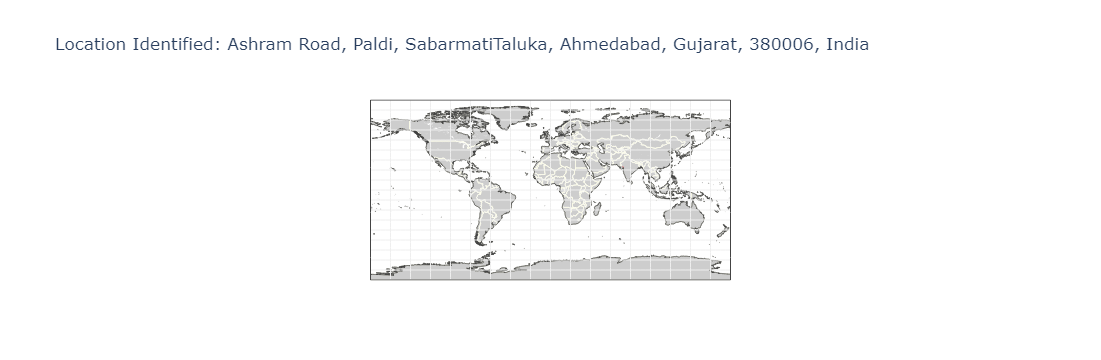

Image op.png exported
['South Western Air Command : 27.721359888643047', 'Western Air Command : 768.7399190169315', 'Central Air Command : 967.1441182183916', 'Southern Air Command : 1682.013019135679', 'Eastern Air Command : 1976.6096927091526']


PermissionError: [Errno 13] Permission denied: 'D:/Threat.pdf'

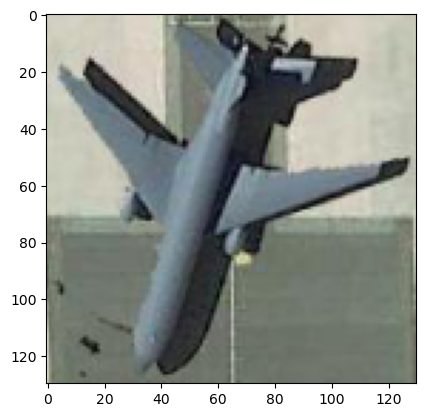

In [63]:

import kaleido
from reportlab.lib.pagesizes import letter 
from reportlab.pdfgen import canvas
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.pdfbase import pdfmetrics
from reportlab.lib import colors
from PIL import Image
import plotly.graph_objects as go
import haversine as hs
from haversine import Unit
import plotly.express as px
import pandas as pd
import plotly.io as pio
from geopy.geocoders import Nominatim
import haversine as hs
from haversine import Unit
from reportlab.pdfgen import canvas
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.pdfbase import pdfmetrics
from reportlab.lib import colors
from PyPDF2 import PdfReader, PdfWriter
#import os
def testSingleAircraft():
    # function takes a single image of an aircraft and classifies the aircraft category
    img = input("Input Image: ")
    image = Image.open(os.path.join(root_path + "/sample/", img))
    img_array = np.array(image)
    aircraft_img = cv2.resize(img_array, (RESIZE_VALUE, RESIZE_VALUE))
    patch = np.expand_dims(aircraft_img, axis=0)
    plt.imshow(aircraft_img)
    
    # Make prediction
    x = np.argmax(model.predict(patch), axis=-1)
    
    # Check and print value
    print("True value:", img)
    if np.isscalar(x):  # x is a scalar
        print("Identified as:", aircraft_types[x], "\n")
        return aircraft_types[x], root_path + "/sample/" + img
    else:  # x is an array
        print("Identified as:", aircraft_types[x[0]], "\n")
        return aircraft_types[x[0]], root_path + "/sample/" + img

ID, Aircraft_img = testSingleAircraft()
print(ID)


Latitude = float(input("Latitude : "))
Longitude = float(input("Longitude : "))

# Initialize Nominatim API
geolocator = Nominatim(user_agent="geoAirCraftDetect")

#Air force commands
CAC = (25.4482807, 81.7340451)
EAC = (25.5788217,91.8910538)
SAC = (8.4798201,76.910944)
WAC = (28.5796921,77.1426222)
SWAC = (23.2439776,72.6958633)

pos = (Latitude,Longitude)

# Dictonery values with calculated values
myDict = {hs.haversine(pos,CAC,unit=Unit.KILOMETERS) : 'Central Air Command', hs.haversine(pos,EAC,unit=Unit.KILOMETERS) : 'Eastern Air Command', hs.haversine(pos,SAC,unit=Unit.KILOMETERS) : 'Southern Air Command', hs.haversine(pos,WAC,unit=Unit.KILOMETERS) : 'Western Air Command', hs.haversine(pos,SWAC,unit=Unit.KILOMETERS) : 'South Western Air Command'}

# Sorting
myKeys = list(myDict.keys())
myKeys.sort()

# Sorted List
sorted_dict = {i: myDict[i] for i in myKeys}

#Min Distance
Min = list(sorted_dict.keys())[0]
Command = MinC = sorted_dict.get(Min)
print(sorted_dict, MinC)

#Assigning Command
Cmd = CAC if MinC == "Central Air Command" else WAC if MinC == "Western Air Command" else SWAC if MinC == "South Western Air Command" else EAC if MinC == "Eastern Air Command" else SAC
print(Command)


# Get location with geocode
location = geolocator.reverse(str(Latitude)+','+str(Longitude))

# Display location
print("\nLocation of the given Latitude and Longitude:")

print(location)

#----------------Map Creation----------------------
fg = go.Figure(data=go.Scattergeo(
    lat = [Latitude, Cmd[0]],
    lon = [Longitude, Cmd[1]],
    mode = 'lines',
    line = dict(width = 2, color = 'red'),
))

fg.update_layout(
    title_text = "Location Identified:\n" + str(location),
    showlegend = False,
    geo = dict(
        resolution = 50,
        showcountries = True,
        showland = True,
        showlakes = True,
        landcolor = 'rgb(205, 205, 205)',
        countrycolor = 'rgb(255, 255, 234)',
        lakecolor = 'rgb(255, 255, 255)',
        projection_type = "equirectangular",
        coastlinewidth = 1,
        lataxis = dict(
            range = [0,0],
            showgrid = True,
            dtick = 10
        ),
        lonaxis = dict(
            range = [0,0],
            showgrid = True,
            dtick = 20
        ),
    )
)
fg.show()

# export as static image
#fg.write_image("test.png", engine="kaleido")
file_path = "D:/op.png"
pio.write_image(fg, file_path)
print("Image op.png exported")

#----------------------------PDF Creation--------------------------------

# File path for saving the PDF
fileName = 'D:/Threat.pdf'
documentTitle = 'sample'
title = 'Aircraft'
subTitle = 'Aircraft Identified'


list1 =[]
for key, val in sorted_dict.items():
       list1.append(str(val) + " : " + str(key)) 
print(list1)

textLines = [
    "Identified Aircraft : " + ID,
    "Location : " + str(Latitude)+ ' , ' + str(Longitude),
    "Nearest Air Base : " + Command,
    " ",
    "Distance From :",
    list1[0],
    list1[1],
    list1[2],
    list1[3],
    list1[4] 
]
# Create a PDF object
pdf = canvas.Canvas(fileName, pagesize=letter)

# Set the title of the document
pdf.setTitle(documentTitle)

# Add the main title
pdf.setFont("Times-Roman", 18)
pdf.setFillColorRGB(0, 0, 255)
pdf.drawCentredString(300, 770, title)

# Add the subtitle
pdf.setFont("Times-Roman", 14)
pdf.setFillColorRGB(255, 0, 0)
pdf.drawCentredString(300, 750, subTitle)

# Draw multiline text (information about the aircraft and its location)
pdf.setFont("Times-Roman", 12)
pdf.setFillColor(colors.black)
text = pdf.beginText(50, 700)
for line in textLines:
    text.textLine(line)
pdf.drawText(text)

# Add an Aircraft image

pdf.drawInlineImage(Aircraft_img, 330, 574, width=200, height=150)

# Add a map image (resizing and placing it)
Map_path = "D:/op.png"
pdf.drawInlineImage(Map_path, 99, 255, width=basewidth, height=hsize)

# Add Aircraft Info from a text file
info_file_path = f"D:/aircraft_image_dataset/Air-info/{ID}.txt"
if os.path.exists(info_file_path):
    with open(info_file_path, "r") as f:
        lines = f.readlines()

    text = pdf.beginText(50, 270)
    text.setFont("Times-Roman", 12)
    text.setFillColor(colors.black)
    for line in lines:
        text.textLine(line.strip())
    pdf.drawText(text)
else:
    print(f"Info file for {ID} not found.")

# Save the PDF
pdf.save()

reader = PdfReader("D:/Threat.pdf")

writer = PdfWriter()

for page in reader.pages:
    writer.add_page(page)

writer.encrypt("code")

# add this
with open("D:/Threat.pdf", "wb") as f:
    writer.write(f)


# 